Original Image


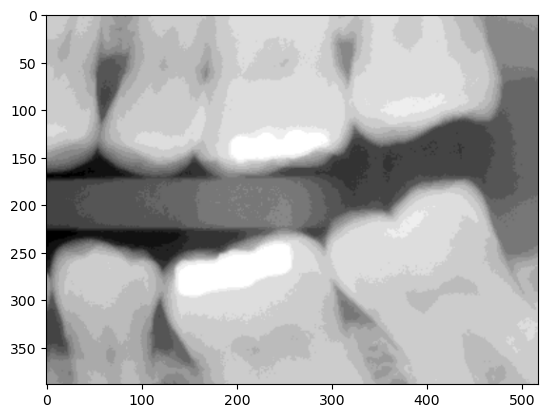

Segmented Image


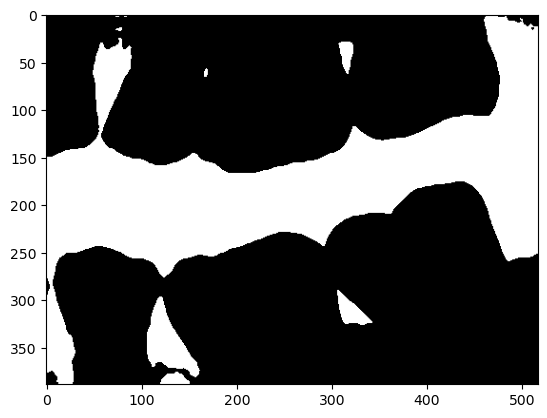

Red Part Segmented Image


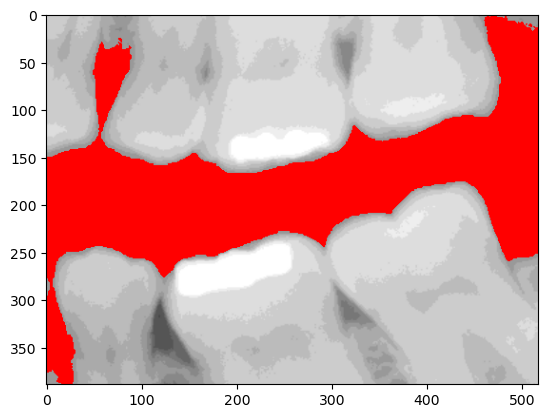

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def SeparateTeeth(imgPath):
    img=cv2.imread(imgPath)
    toGrayScale=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert the image into grey scale image
    toBlur=cv2.GaussianBlur(toGrayScale,(5,5),0)
    _, threshHoldImg=cv2.threshold(toBlur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  # Corrected thresholding operation
    # Perform morphological operations to improve segmentation
    kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(threshHoldImg, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Extract the teeth region using the segmented mask
    teeth = cv2.bitwise_and(img, img, mask=sure_bg)
    
    return threshHoldImg

def highlight_issue_teeth(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to segment the teeth region
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours in the segmented teeth region
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the highest intensity (brightest area)
    max_intensity_contour = max(contours, key=lambda c: cv2.contourArea(c))

    # Create a mask for the contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [max_intensity_contour], -1, 255, thickness=cv2.FILLED)

    # Apply the mask to the original image to highlight the affected region in red
    highlighted_image = image.copy()
    highlighted_image[mask == 255] = [0, 0, 255]  # Set affected region to red (BGR format)

    return highlighted_image

    
imgpath='E:/Figures/Image_Q1.PNG'  # Corrected path format
print('Original Image')
img = cv2.imread(imgpath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.show()
img_segmented = SeparateTeeth(imgpath)
print('Segmented Image')
plt.imshow(cv2.cvtColor(img_segmented, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.show()

redPartImage=highlight_issue_teeth(imgpath)
print('Red Part Segmented Image')
plt.imshow(cv2.cvtColor(redPartImage, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.show()


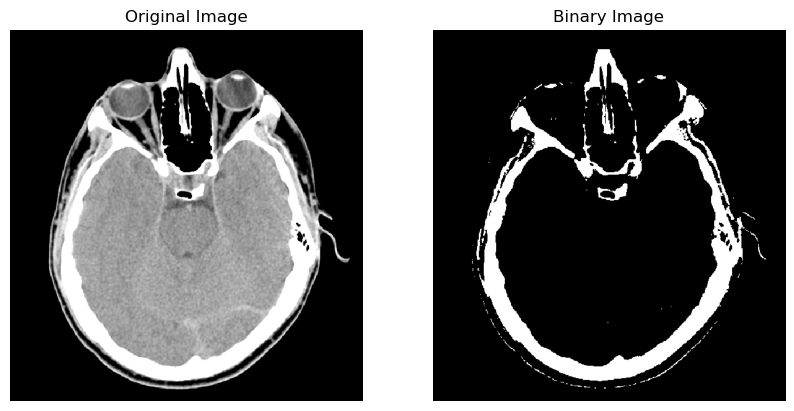

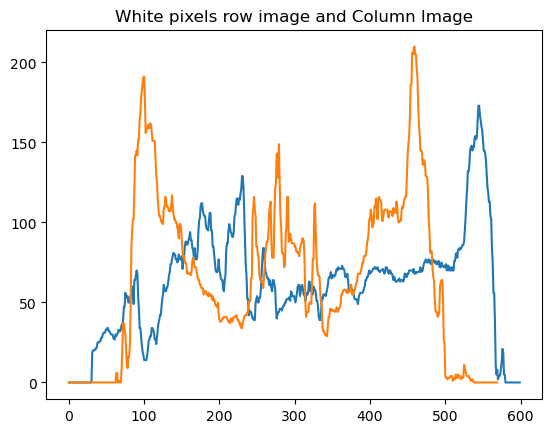

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def intensity_slicing(image_path, lower_threshold, upper_threshold):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply intensity slicing to create a binary mask
    binary_mask = np.zeros_like(gray)
    binary_mask[(gray >= lower_threshold) & (gray <= upper_threshold)] = 255

    return binary_mask

# Path to the image
image_path = 'E:/Figures/Image_Q2.tif'

# Define the threshold range for intensity slicing
lower_threshold = 210 
upper_threshold = 255  

# Apply intensity slicing
binary_mask = intensity_slicing(image_path, lower_threshold, upper_threshold)

# Read the original image
original_image = cv2.imread(image_path)

# Display the original image and the binary image side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Binary image
plt.subplot(1, 2, 2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()

white_pixel_counts_row = np.sum(binary_mask == 255, axis=1)
white_pixel_counts_col = np.sum(binary_mask == 255, axis=0)

plt.plot(white_pixel_counts_row)
plt.title('White pixels row image and Column Image')

plt.plot(white_pixel_counts_col)



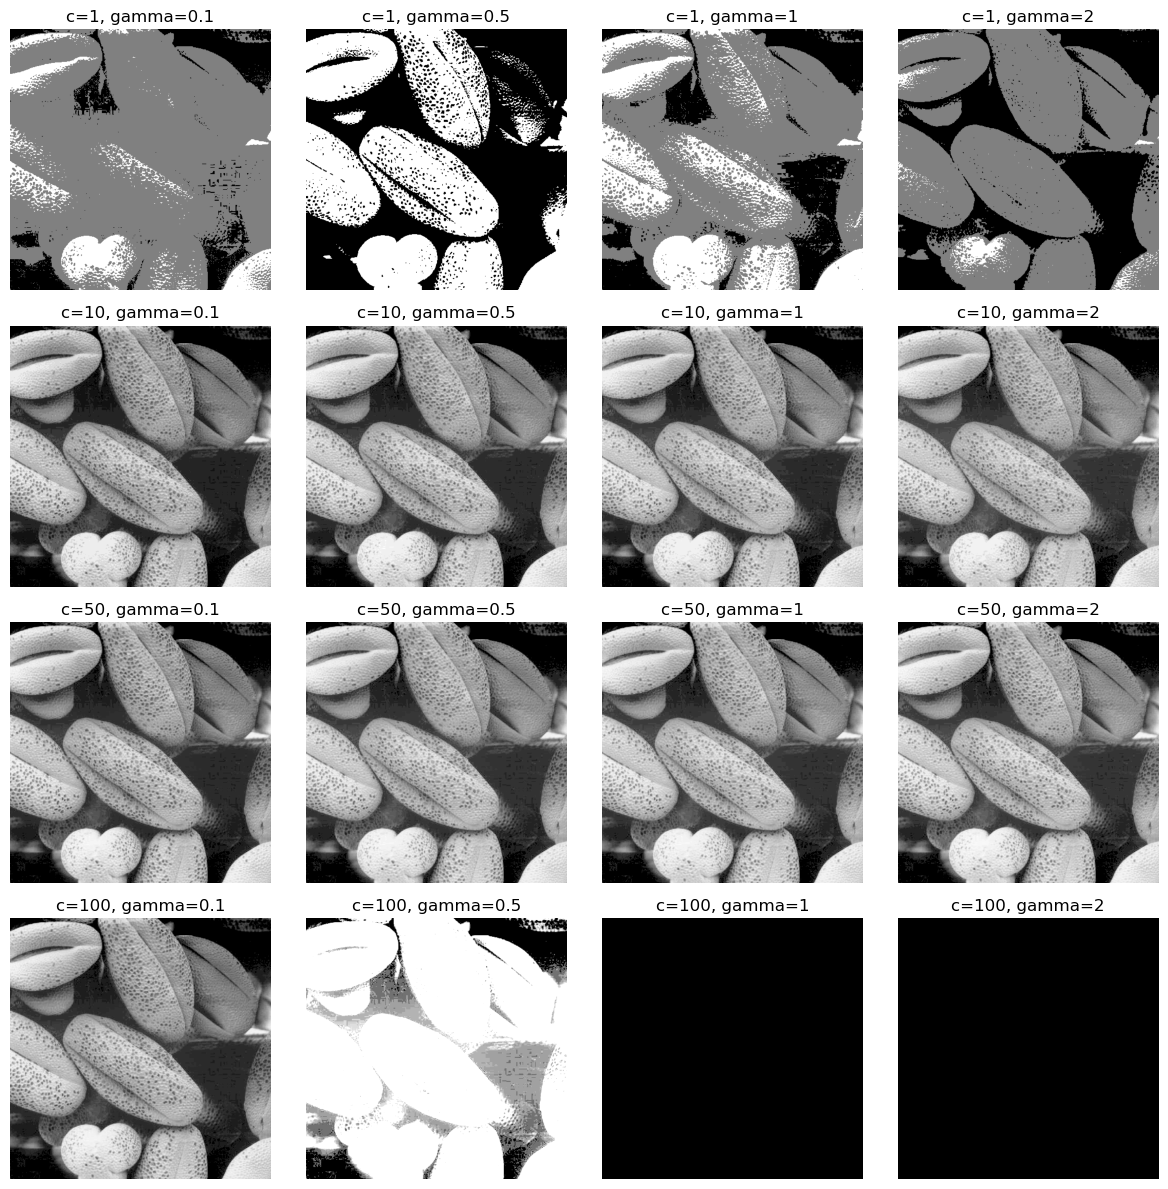

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('E:/Figures/Image_Q3.tif', cv2.IMREAD_GRAYSCALE)

# Define a range of parameter values for each transformation
c_values = [1, 10, 50, 100]
gamma_values = [0.1, 0.5, 1, 2]

# Apply different log transformations and display the results
fig, axs = plt.subplots(len(c_values), len(gamma_values), figsize=(12, 12))

for i, c in enumerate(c_values):
    for j, gamma in enumerate(gamma_values):
        # Apply the logarithmic transformation
        transformed_image = c * np.log1p(gamma * image)

        # Clip the pixel values to the range [0, 255]
        transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

        # Display the transformed image
        axs[i, j].imshow(transformed_image, cmap='gray')
        axs[i, j].set_title(f'c={c}, gamma={gamma}')
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()
